# Lecture 23 - Root Finding and Optimization 

## Overview, Objectives, and Key Terms
 
In [Lecture 19](ME400_Lecture_19.ipynb), SymPy was applied to perform symbolic differentuation, and in [Lecture 21]( ME400_Lecture_21.ipynb), finite-difference approximations were developed to perform numerical differentiation.  We'll need both techniques as we begin to solve **nonlinear equations** and **optimization problems**.  Both subjects are rich, so we'll touch on only the basics, but you'll have tools at your disposal to tackle such problems in varied applications.


### Objectives

By the end of this lesson, you should be able to

- Find one or more roots of a one-dimensional, nonlinear equation $f(x) = 0$ using the bisection and Newton methods.
- Find local extrema of a function $f(x)$ using the bisection and Newton methods.
- Establish the order of an integration scheme using numerical, graphical, or symbolic means.

### Key Terms

- nonlinear equation
- transcendental equation
- graphical solution
- bisection method
- Newton's method
- quadratic convergence
- second-order convergence
- order of convergence
- secant method
- Steffensen's method
- nonlinear systems
- Jacobian matrix
- `scipy.optimize.fsolve`
- optimization
- extremum
- critical point
- objective function
- `scipy.optimize.minimize`

## Nonlinear Equations

Linear equations are characterized by *linear combinations* or the unknowns, e.g.,

$$
\begin{split}
 ax + by &= 1 \\
 cx + dy &= 2 
\end{split}
$$

Any deviation from this pattern results in **nonlinear equations**, which we can solve
  - analytically (or symbolically)
  - graphically
  - numerically

### Analytic Solutions

In *rare* cases, nonlinear equations have closed-form solutions.

**Exercise**: Find all values of $x$ such that $\sin(ax) - b = 0$.  


### Graphical Solutions

Can't solve it?  **Plot it!**

For single equation $f(x) = g(x)$:
  - plot $f(x)$ and $g(x)$ over the range of interest to identify intersections
  - plot $f(x)-g(x)$ to identify roots

**Exercise**: The solution of transient heat-conduction problems often involves a technique called *separation of variables*.  Application of this technique to an infinite slab of thickness $2L$ subject to certain initial and boundary conditions leads to the transcendental equation

$$
  \cot \lambda L = \frac{\lambda L}{hL/k} = \frac{\lambda L}{\text{Bi}} \, ,
$$

where $\lambda$ is a dimensionless, undetermined parameter, $h$ is the heat transfer coefficient, $k$ is the thermal conductivity, and $\text{Bi}$ is the *Biot number*.  The Biot number quantifies how hard it is for heat to flow *within* a body relative to how hard it is to flow *through the outer surface* of the body.  Only for certain values of $\lambda$ can the equation be solved. Determine these values graphically by plotting the left-hand and right-hand sides of the equation as functions of $\lambda L$.

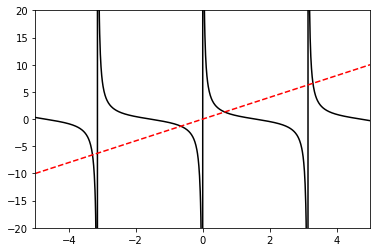

In [1]:
import matplotlib.pyplot as plt
import numpy as np
L = 5.0 # this would be a problem given
Bi = 0.5 # this would also be given
lambda_L = np.linspace(-5, 5, 1000) # lambda defined implicitly
plt.plot(lambda_L, 1/np.tan(lambda_L), 'k', 
         lambda_L, lambda_L/Bi, 'r--')
plt.axis([-5, 5, -20, 20])
plt.show()

## Determining Roots Numerically

The numerical solution of $f(x) = 0$ can be challenging since it requires we know at least a little about the desired solution, particularly the range in which the root is contained. We'll explore three basic schemes for solving $f(x)$: the [bisection method](http://mathworld.wolfram.com/Bisection.html), [Newton's method](http://mathworld.wolfram.com/NewtonsMethod.html), and the secant method.

### Bisection

Just like **binary search**!  Now, compare *sign* rather than *magnitude* (and keep **repeating**).

```
'''Bisection method for finding an isolated root of f between a and b'''
Input: f, a, b, tau

# Define the left and right boundaries
Set L = a
Set R = b

# Define the central point
Set C = (a+b)/2

# Go until f(C) is close enough to zero (i.e., that
# C is close enough to the root between a and b
While |f(C)| > tau 
    If sign(f(C)) == sign(f(L)) then
        # the root must be between C and L
        L = C
    Otherwise
        # the root must be between L and C
        R = C
    C = (L+R)/2
Output: C
```

Graphical display of bisection to find first positive root of $\sin(x) - 2/5$:

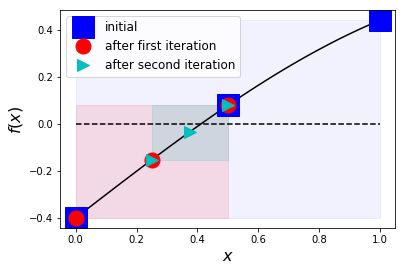

In [2]:
import nonlinear_plots
nonlinear_plots.bisection_root()

### Newton's Method

Often, a better way to find roots of $f(x) = 0$ is [Newton's method](http://mathworld.wolfram.com/NewtonsMethod.html).

Like bisection,  Newton's method produces a sequence of approximations.

Unlike bisection, require an *initial guess* $x_0$ for the root $x_r$ (and it should be "close").

Quick motivation for Newton *from the math*:

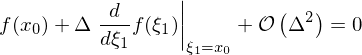

In [3]:
import sympy as sy
sy.init_printing()
f, x_0, Delta = sy.symbols('f x_0 Delta')
x_r = x_0 + Delta
eq = sy.Eq(sy.series(f(x_r), Delta, 0, 2), 0)
eq

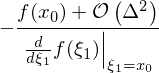

In [4]:
sy.solve(eq, Delta)[0]

Take a leap of faith: **ignore the** $\mathcal{O}(\Delta^2)$ **term** and set 

$$
  x_r \approx x_1 = x_0 + \Delta
$$

```
'''Newton's method for finding the root f given x_0'''
Input: f, fp, x_0, tau
Set x = x_0
While |f(x)| > tau do
   # Compute the Newton "step" 
   Set Delta = -f(x)/fp(x)
   # Compute the next value of x
   Set x = x + Delta
Output: x
```

Quick motivation of Newton *from the geometry*...

**Exercise**: Solve $f(x) = \sin(x)-2/5 = 0$ starting with $x_0 = 0.5$ until $|f(x)| < 10^{-5}$.

Such convergence is called **quadratic convergence** or **second-order convergence**.  

More generally, $\epsilon_{n+1} = C \epsilon_n^p$, where $p$ is the **order of convergence** and $C$ is the **rate of convergence**.

### Secant Method

Actually, just like Newton but without $f'(x)$!  Use a *finite difference* instead.

```
'''Secant method for finding the root f given x_0'''
Input: f, x_0, tau
Set x = x_0
Set x_0 = x - tau
While |f(x)| > tau do
   # Approximate the derivative
   Set fp = (f(x)-f(x_0))/(x-x_0)
   # Compute the Newton "step"
   Set Delta = -f(x)/fp
   # Store old x, and compute next value
   Set x_0 = x
   Set x = x + Delta
Output: x
```

Depending on $f(x)$ (and its cost), *may* be better to use $x$ and $x+\delta$ for finite difference where $\delta < (x-x_0)$.

## Solving Systems of Nonlinear Equations Numerically

From $f(x) = 0$ to $\mathbf{f}(\mathbf{x}) = \mathbf{0}$...


...and from $f'(x)$ to the **Jacobian** matrix $\mathbf{J}$:

$$
  \mathbf{J}(\mathbf{x}) = \begin{bmatrix}
    \frac{\partial f_0}{\partial x_0} & \frac{\partial f_1}{\partial x_0} & \ldots & \frac{\partial f_{n-1}}{\partial x_0} \\
    \frac{\partial f_0}{\partial x_1} & \frac{\partial f_1}{\partial x_1} & \ldots & \frac{\partial f_{n-1}}{\partial x_1} \\
         &     &  \ddots &  \\
    \frac{\partial f_0}{\partial x_{n-1}} & \frac{\partial f_1}{\partial x_{n-1}} & \ldots & \frac{\partial f_{n-1}}{\partial x_{n-1}} 
\end{bmatrix}
$$

(here, partial derivatives evaluated at $\mathbf{x}$)

Newton's method leads to the sequence

$$ 
  \mathbf{x}_{n+1} = \mathbf{x}_{n} - \mathbf{J}^{-1}(\mathbf{x}_n) \mathbf{f}(\mathbf{x}_n) \, .
$$

### `scipy.optimize.fsolve`

Good to know the equations, but better (usually) to use SciPy and its `scipy.optimize.fsolve` function:

The signature (from `help(fsolve)`) is
```python
fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
```

Here, `func` represents the nonlinear system function $\mathbf{f}(\mathbf{x})$, and `args` represents any values needed to define what $\mathbf{f}(\mathbf{x})$ does.  The initial guess is `x0`.  If available, `fprime` should compute $\mathbf{J}(\mathbf{x})$; if not provided, `fsolve` approximates the Jacobian using a forward-difference approximation.

**Exercise**: Solve the nonlinear system of equations $x-y = 4$ and $x^2 + y = -3$ using `fsolve`  $x_0=1/2$ and $y_0=-3$.

In [5]:
from scipy.optimize import fsolve

def f(z):
    x, y = z # unpack z
    return [x-y-4, x**2+y+3]

z0 = [1/2, -3]
x, y = fsolve(f, z0)
x, y

## Recap

By the end of this lesson, you should be able to

- Find one or more roots of a one-dimensional, nonlinear equation $f(x) = 0$ using the bisection and Newton methods.
- Find local extrema of a function $f(x)$ using the bisection and Newton methods.
- Use `fsolve` to solve nonlinear systems.

**Exam Friday**. Same format (no notes, etc.)  Covers through finite differences, focuses on material since Exam 1, but should be (like life) assumed cumulative.  **Questions?**